In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

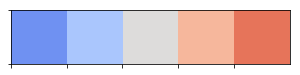

In [2]:
# sns.set()
# sns.set_style("whitegrid")
# sns.palplot(sns.color_palette("Paired"))
sns.palplot(sns.color_palette("coolwarm", 5))

In [3]:
def plot_embeddings(embeddings, ids, labels, 
                    use_color=[0, 1, 2, 3, 4], plot_3d=False):
    """
    embeddings [num, dim]: tSNE/PCA embeddings of predicted embeddings
    ids [num]: each embedding correspond to a class (e.g. [0])
    labels str[num]: the name of classes
    """
    # colors = np.array(sns.color_palette("Paired"))
    colors = np.array(sns.color_palette("coolwarm", max(use_color)+1))

    if plot_3d:
        fig = plt.figure(figsize=(15, 15))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], s=75, 
                   color=colors[[use_color[id] for id in ids]])
    else:
        fig, ax = plt.subplots(figsize=(15, 15))        
        ax.scatter(embeddings[:, 0], embeddings[:, 1], s=75, 
                   color=colors[[use_color[id] for id in ids]])
    ax.legend([labels], fontsize=20, fancybox=True, framealpha=0.2)
    
    patches = []
    for i, label in enumerate(labels):
        patches.append(mpatches.Patch(color=colors[use_color[i]], label=label))

    plt.legend(handles=patches, fontsize=40, loc=2)

In [4]:
def get_embeddings_and_labels_from_hdf5(name, max_num=1000):
    import h5py
    f = h5py.File(name+'.hdf5','r')
    embeddings = f['embedding'].value[:max_num]
    print('embedding shape: {}'.format(embeddings.shape))

    # labels from txt
    txt_f = open(name+'.txt', 'r')
    lines = [line.strip() for line in txt_f.readlines()]
    classes = sorted(list(np.unique(lines)))
    print('classes: {}'.format(classes))    
    labels = [classes.index(line) for line in lines][:max_num]

    return embeddings, labels, classes

In [5]:
def dimension_reduction(embedding, n_components=2, dr_type='tSNE'):
    if dr_type == 'tSNE':
        from sklearn.manifold import TSNE
        embedding_reduced = TSNE(n_components=n_components, learning_rate=80, perplexity=8).fit_transform(embedding)
    elif dr_type == 'PCA':
        from sklearn.decomposition import PCA
        pca = PCA(n_components=n_components, svd_solver='full')
        embedding_reduced = pca.fit_transform(embedding)
    elif dr_type == 'PCA-tSNE':
        from sklearn.decomposition import PCA
        from sklearn.manifold import TSNE
        pca = PCA(n_components=embedding.shape[-1]//10, svd_solver='full')
        embedding_reduced = pca.fit_transform(embedding)        
        embedding_reduced = TSNE(n_components=n_components, learning_rate=100, perplexity=10).fit_transform(embedding_reduced)
    else:
        raise NotImplementedError
    print('embedding_reduced shape: {}'.format(embedding_reduced.shape))
    return embedding_reduced

In [6]:
def hdf5_to_plot(name, max_num=1000, dr_type='tSNE', plot_3d=False):
    embeddings, labels, classes = get_embeddings_and_labels_from_hdf5(name, max_num=max_num)
    """
    random_scale = (np.random.rand(embeddings.shape[0], embeddings.shape[1])*2-1)/2.+1
    print(random_scale)
    embeddings = embeddings*random_scale
    """
    # print(classes, labels)
    embeddings_reduced = dimension_reduction(embeddings, n_components=2 if not plot_3d else 3, dr_type=dr_type)

    random_scale = (np.random.rand(embeddings_reduced.shape[0], embeddings_reduced.shape[1])*2-1)/4.+1
    print(random_scale)
    embeddings_reduced = embeddings_reduced*random_scale
    
    plot_embeddings(embeddings_reduced, labels, classes, plot_3d=plot_3d)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


embedding shape: (2000, 128)
classes: ['Aircraft', 'CUB', 'FC100', 'Mini-ImageNet', 'Omniglot']
embedding_reduced shape: (2000, 2)
[[0.84136078 0.85548187]
 [0.985641   0.9612655 ]
 [0.98060975 1.14010206]
 ...
 [0.82542281 1.18188894]
 [1.18131897 1.05696211]
 [1.0758227  1.09665381]]


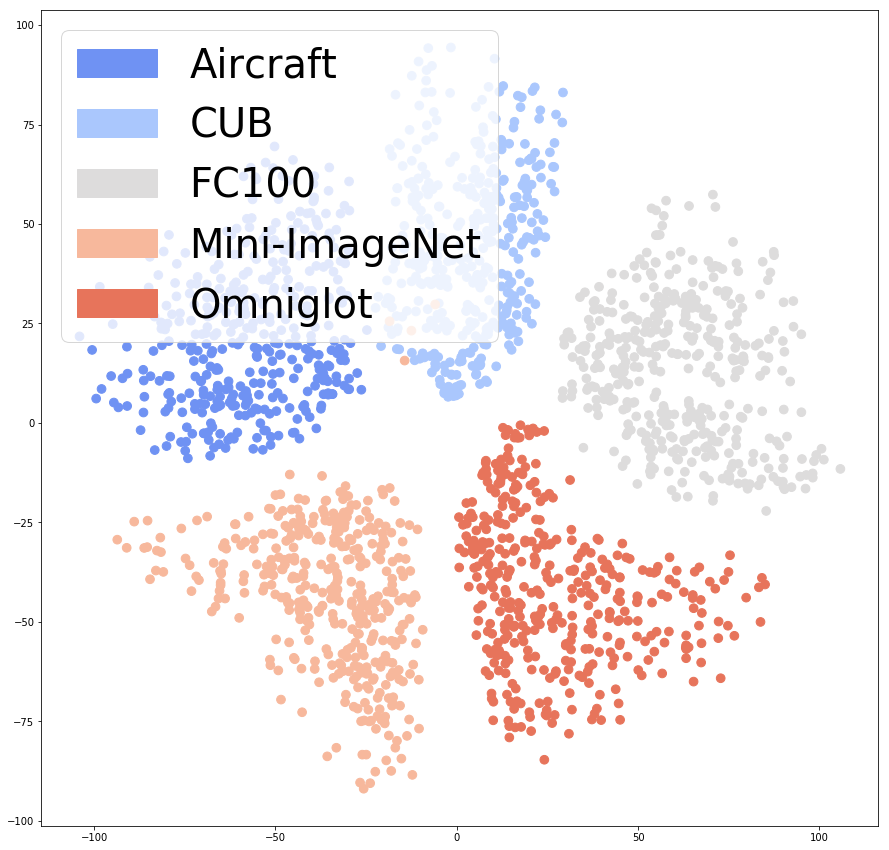

In [7]:
hdf5_to_plot('embeddings/mmaml_5mode_5w1s_rebuttal', 
             max_num=2000, dr_type='tSNE')

embedding shape: (2000, 128)
classes: ['Bird', 'FC100', 'MiniImageNet', 'Omniglot', 'aircraft']
embedding_reduced shape: (2000, 2)
[[1.20261416 0.85670026]
 [1.24121273 0.94762761]
 [1.04169856 0.99107663]
 ...
 [0.76865122 0.93960045]
 [1.1555126  1.13655049]
 [1.20634579 1.1541989 ]]


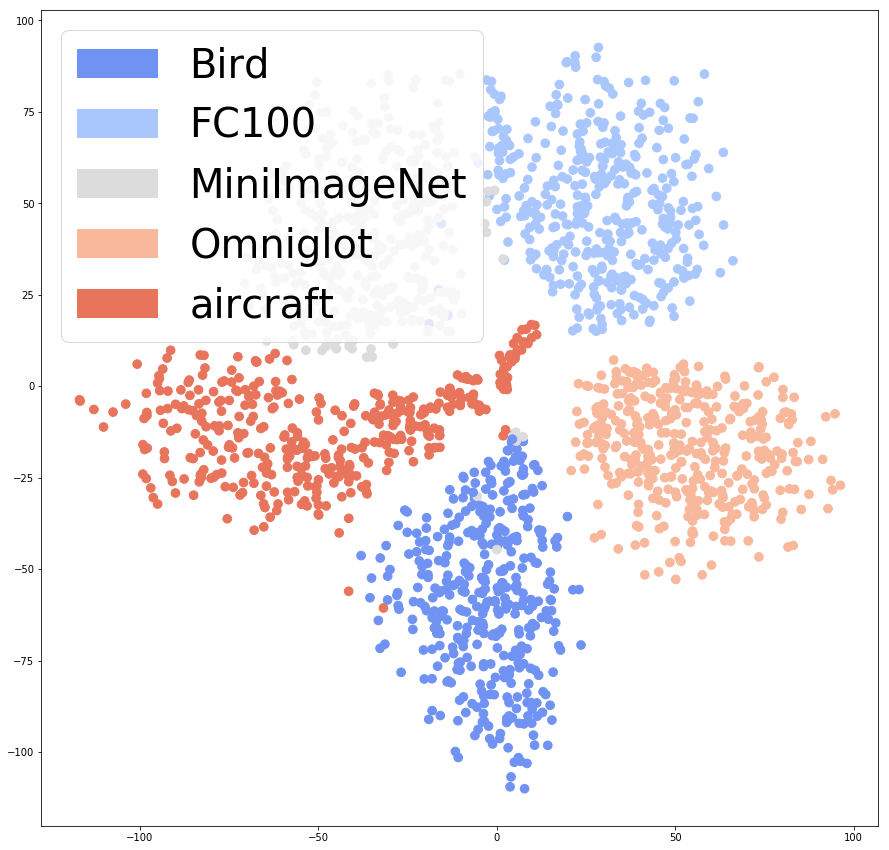

In [8]:
hdf5_to_plot('embeddings/mmaml_5mode_5w5s_rebuttal', 
             max_num=2000, dr_type='tSNE')

embedding shape: (1000, 128)
classes: ['Aircraft', 'CUB', 'FC100', 'Mini-ImageNet', 'Omniglot']
embedding_reduced shape: (1000, 3)
[[1.14240413 0.86454893 0.80318339]
 [1.15218962 1.19180811 1.13583765]
 [1.01702748 0.93187783 1.05220047]
 ...
 [1.14860835 0.82317385 1.14140845]
 [0.85910941 0.84159313 0.82059928]
 [0.91174364 1.11926188 1.14827123]]


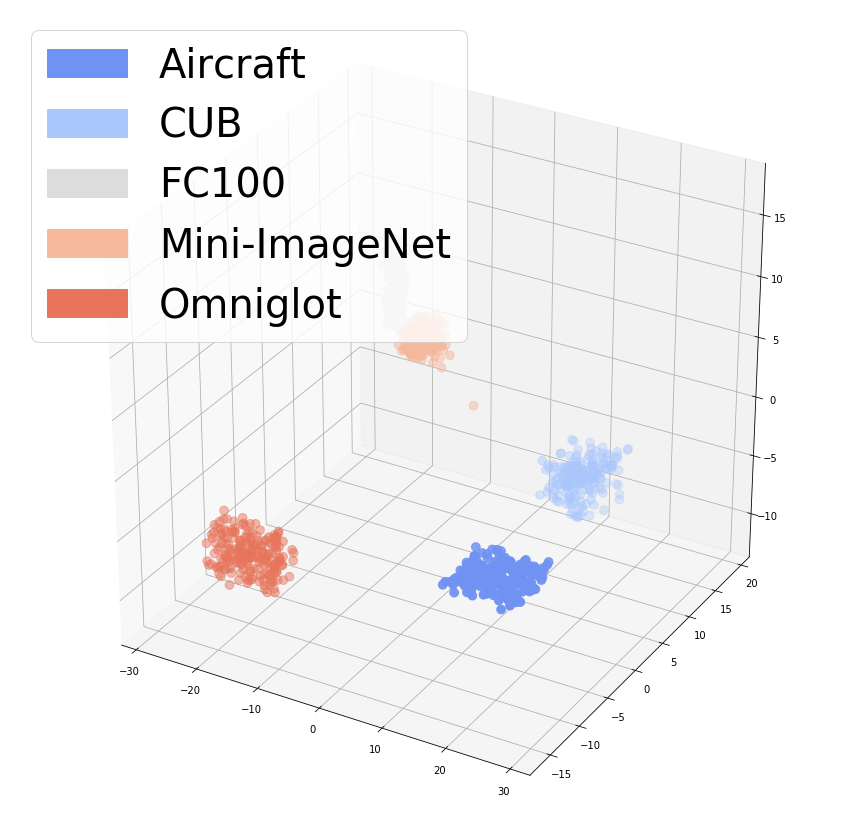

In [9]:
hdf5_to_plot('embeddings/mmaml_5mode_5w1s_rebuttal', 
             max_num=1000, dr_type='PCA', plot_3d=True)